In [46]:
import os
import numpy as np
import cv2

# Loading the data

In [47]:
path_to_data = './dataset/'
path_to_cr_data ='./dataset/cropped/'
img_dirs =[]
for entry in os.scandir(path_to_cr_data):
#     print(path_to_cr_data+"/"+str(entry))
    img_dirs.append(entry.path)
img_dirs

['./dataset/cropped/anish',
 './dataset/cropped/avaya',
 './dataset/cropped/bipul_chettri',
 './dataset/cropped/pranish',
 './dataset/cropped/rajesh_hamal']

In [48]:
for img_dir in img_dirs:
    print(img_dir)

./dataset/cropped/anish
./dataset/cropped/avaya
./dataset/cropped/bipul_chettri
./dataset/cropped/pranish
./dataset/cropped/rajesh_hamal


In [49]:
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict


{'anish': ['./dataset/cropped/anish\\anish1.png',
  './dataset/cropped/anish\\anish10.png',
  './dataset/cropped/anish\\anish11.png',
  './dataset/cropped/anish\\anish14.png',
  './dataset/cropped/anish\\anish16.png',
  './dataset/cropped/anish\\anish2.png',
  './dataset/cropped/anish\\anish28.png',
  './dataset/cropped/anish\\anish3.png',
  './dataset/cropped/anish\\anish30.png',
  './dataset/cropped/anish\\anish32.png',
  './dataset/cropped/anish\\anish4.png',
  './dataset/cropped/anish\\anish46.png',
  './dataset/cropped/anish\\anish5.png',
  './dataset/cropped/anish\\anish51.png',
  './dataset/cropped/anish\\anish52.png',
  './dataset/cropped/anish\\anish54.png',
  './dataset/cropped/anish\\anish56.png',
  './dataset/cropped/anish\\anish57.png',
  './dataset/cropped/anish\\anish58.png',
  './dataset/cropped/anish\\anish6.png',
  './dataset/cropped/anish\\anish60.png',
  './dataset/cropped/anish\\anish63.png',
  './dataset/cropped/anish\\anish65.png',
  './dataset/cropped/anish\\ani

In [50]:
celebrity_file_names_dict.items()

dict_items([('anish', ['./dataset/cropped/anish\\anish1.png', './dataset/cropped/anish\\anish10.png', './dataset/cropped/anish\\anish11.png', './dataset/cropped/anish\\anish14.png', './dataset/cropped/anish\\anish16.png', './dataset/cropped/anish\\anish2.png', './dataset/cropped/anish\\anish28.png', './dataset/cropped/anish\\anish3.png', './dataset/cropped/anish\\anish30.png', './dataset/cropped/anish\\anish32.png', './dataset/cropped/anish\\anish4.png', './dataset/cropped/anish\\anish46.png', './dataset/cropped/anish\\anish5.png', './dataset/cropped/anish\\anish51.png', './dataset/cropped/anish\\anish52.png', './dataset/cropped/anish\\anish54.png', './dataset/cropped/anish\\anish56.png', './dataset/cropped/anish\\anish57.png', './dataset/cropped/anish\\anish58.png', './dataset/cropped/anish\\anish6.png', './dataset/cropped/anish\\anish60.png', './dataset/cropped/anish\\anish63.png', './dataset/cropped/anish\\anish65.png', './dataset/cropped/anish\\anish7.png', './dataset/cropped/anish

# Wavelet Transform

In [51]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [52]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'anish': 0, 'avaya': 1, 'bipul_chettri': 2, 'pranish': 3, 'rajesh_hamal': 4}

In [53]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [54]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(124, 4096)

# Model Pipelining

In [55]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [56]:
# Pipeline??

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6451612903225806

In [58]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       1.00      0.33      0.50         3
           2       1.00      0.33      0.50         6
           3       0.50      1.00      0.67         2
           4       0.50      0.80      0.62        10

    accuracy                           0.65        31
   macro avg       0.78      0.63      0.61        31
weighted avg       0.77      0.65      0.64        31



In [59]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [61]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.710526,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.528655,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.688889,{'logisticregression__C': 1}


# Selecting the best class

In [62]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [63]:
best_estimators['svm'].score(X_test,y_test)

0.6774193548387096

In [64]:
best_estimators['random_forest'].score(X_test,y_test)

0.4838709677419355

In [65]:
best_clf = best_estimators['svm']

# Classification Matrix

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 2, 0, 1, 0],
       [1, 1, 0, 0, 1],
       [0, 0, 3, 2, 1],
       [0, 0, 0, 2, 0],
       [0, 1, 0, 1, 8]], dtype=int64)

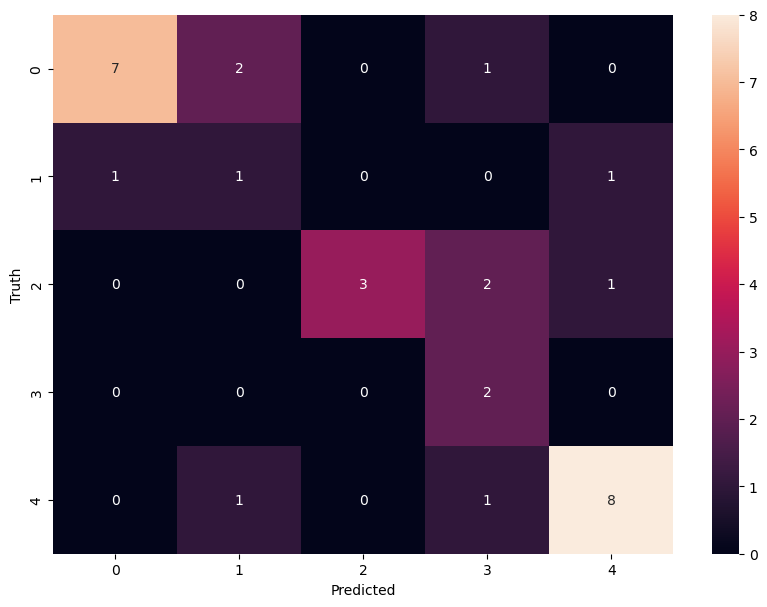

In [67]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [68]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Saving the model

In [69]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [70]:
X.shape

(124, 4096)

# Predicting the model

In [181]:
def X_fit(training_image):
    img = cv2.imread(training_image)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    return combined_img.reshape(1,4096)

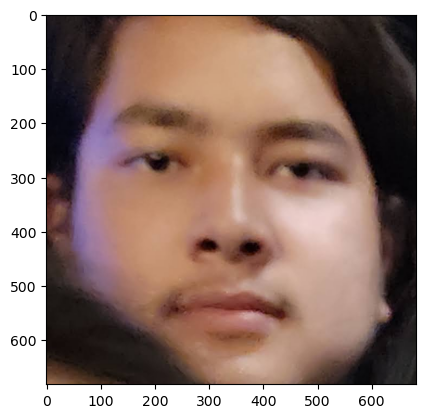

In [182]:
test = X_fit("./test_images/6.png")


In [203]:
value = best_clf.predict(test)

In [204]:
list(class_dict.keys())[list(class_dict.values()).index(value)]

'pranish'

Sorry, folks my model did not perform this well so I didn't feel like explaining about this , there are lots of errors in the model I know(especially predicting with new image). I don't even feel like writing readme.md but then I have followed the tutorial along so I make sure to make the facial recognition as my task. I am surely doing this.